# Time Series Data Analysis

## Introduction
This Jupyter Notebook explores time series data analysis using Python.

### Glossary

- **Import Packages**: Section where necessary Python packages are imported for data analysis and visualization.

- **Loading Data**: Section dedicated to loading the time series dataset into the notebook.

- **Data Cleaning**: Process of cleaning the dataset by handling missing values, removing duplicates, and correcting data types.

- **Date Problem**: Section addressing any issues related to date formatting or data types.

- **Missing Values**: Explanation and handling of missing values within the dataset.

- **Predicting Null Values**: Predicting the Null values with the simple Machine learning model using Ranndom Forest Regressor

- **Data Visualization**: Visual representation of the time series data through various plots and charts.

- **Conclusion**: Final remarks and summary of findings from the time series analysis.

  
## Contents
1. [Import Packages](#import-packages)
2. [Loading Data](#loading-data)
3. [Data Cleaning](#data-cleaning)
4. [Date Problem](#date-problem)
5. [Missing Values](#missing-values)
6. [Predicting Null Values](#predicting-null-values)
7. [Data Visualization](#data-visualization)
8. [Conclusion](#conclusion)


### import packeges
<a id="import-packages"></a>

In [186]:

# data exploring
import pandas as pd
import numpy as np
from datetime import datetime

# visulization
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
#!pip install missingno
import missingno as msno

# null values prediction
from sklearn.ensemble import RandomForestRegressor

### Loading the Data
<a id="loading-data"></a>

In [187]:
df = pd.read_csv('Behzad_01_training.csv')

In [188]:
df

,1900,5.75x,53.25x,2.4x,2.5x,2.4x.1,7.0x,10.9x,16.2x,18.4x,16.6x,14.5x,NA,6.0x,5.1x
0,1900,5.75x,52.75x,2.6x,1.1x,2.4x,7.5x,11.7x,16.7x,18.9x,17.0x,15.1x,10.8x,6.6x,6.1x
1,1900,5.75x,52.25x,3.2x,1.8x,3.1x,7.7x,11.8x,16.6x,19.0x,16.9x,14.8x,10.7x,6.4x,5.9x
2,1900,5.75x,51.75x,3.5x,3.0x,3.3x,7.9x,12.1x,16.5x,19.2x,16.7x,14.5x,10.3x,5.9x,5.6x
3,1900,5.75x,51.25x,4.4x,4.0x,4.0x,8.9x,12.6x,17.2x,19.8x,16.8x,15.0x,10.7x,7.2x,6.2x
4,1900,5.75x,50.75x,4.4x,3.7x,3.7x,8.2x,12.5x,16.7x,19.6x,16.5x,14.9x,10.3x,6.3x,5.5x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31972,2017,14.75x,49.25x,-6.0x,1.0x,5.9x,6.3x,13.7x,18.3x,18.6x,18.4x,11.7x,9.6x,3.3x,0.4x
31973,2017,14.75x,48.75x,-5.9x,1.3x,6.2x,6.8x,13.6x,18.6x,18.8x,19.1x,11.7x,9.7x,3.4x,-0.3x
31974,2017,14.75x,48.25x,-4.5x,2.0x,7.2x,7.9x,14.9x,19.6x,19.4x,19.6x,12.9x,10.5x,3.9x,0.9x
31975,2017,14.75x,47.75x,-7.5x,-0.2x,4.6x,5.2x,11.8x,16.5x,16.3x,16.6x,9.6x,7.6x,1.3x,-1.9x


In [132]:
df.head()

,1900,5.75x,53.25x,2.4x,2.5x,2.4x.1,7.0x,10.9x,16.2x,18.4x,16.6x,14.5x,NA,6.0x,5.1x
0,1900,5.75x,52.75x,2.6x,1.1x,2.4x,7.5x,11.7x,16.7x,18.9x,17.0x,15.1x,10.8x,6.6x,6.1x
1,1900,5.75x,52.25x,3.2x,1.8x,3.1x,7.7x,11.8x,16.6x,19.0x,16.9x,14.8x,10.7x,6.4x,5.9x
2,1900,5.75x,51.75x,3.5x,3.0x,3.3x,7.9x,12.1x,16.5x,19.2x,16.7x,14.5x,10.3x,5.9x,5.6x
3,1900,5.75x,51.25x,4.4x,4.0x,4.0x,8.9x,12.6x,17.2x,19.8x,16.8x,15.0x,10.7x,7.2x,6.2x
4,1900,5.75x,50.75x,4.4x,3.7x,3.7x,8.2x,12.5x,16.7x,19.6x,16.5x,14.9x,10.3x,6.3x,5.5x


In [133]:
# set column and index for the data 
df.columns = range(0, 15)

In [134]:
df.index

RangeIndex(start=0, stop=31977, step=1)

In [135]:
df.columns

RangeIndex(start=0, stop=15, step=1)

In [136]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1900,5.75x,52.75x,2.6x,1.1x,2.4x,7.5x,11.7x,16.7x,18.9x,17.0x,15.1x,10.8x,6.6x,6.1x
1,1900,5.75x,52.25x,3.2x,1.8x,3.1x,7.7x,11.8x,16.6x,19.0x,16.9x,14.8x,10.7x,6.4x,5.9x
2,1900,5.75x,51.75x,3.5x,3.0x,3.3x,7.9x,12.1x,16.5x,19.2x,16.7x,14.5x,10.3x,5.9x,5.6x
3,1900,5.75x,51.25x,4.4x,4.0x,4.0x,8.9x,12.6x,17.2x,19.8x,16.8x,15.0x,10.7x,7.2x,6.2x
4,1900,5.75x,50.75x,4.4x,3.7x,3.7x,8.2x,12.5x,16.7x,19.6x,16.5x,14.9x,10.3x,6.3x,5.5x


### Data cleaning 
<a id="data-cleaning"></a>

- checking the type of featurs
- deleting unnecessary values
- convert the 'year' column into Datatime



In [137]:
# check the type of datas
df.dtypes

0      int64
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
dtype: object

In [138]:
#deleting 'x' 
df = df.replace('x', '', regex=True)

In [139]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1900,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1


In [140]:
# convert the types into float
for col in df.columns[1:]:
    df[col] = df[col].astype(float)

In [141]:
df.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
dtype: object

In [142]:
#convert the 'year' column into Datatime
df[0] = pd.to_datetime(df[0], format='%Y')

In [143]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1900-01-01,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1
1,1900-01-01,5.75,52.25,3.2,1.8,3.1,7.7,11.8,16.6,19.0,16.9,14.8,10.7,6.4,5.9
2,1900-01-01,5.75,51.75,3.5,3.0,3.3,7.9,12.1,16.5,19.2,16.7,14.5,10.3,5.9,5.6
3,1900-01-01,5.75,51.25,4.4,4.0,4.0,8.9,12.6,17.2,19.8,16.8,15.0,10.7,7.2,6.2
4,1900-01-01,5.75,50.75,4.4,3.7,3.7,8.2,12.5,16.7,19.6,16.5,14.9,10.3,6.3,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31972,2017-01-01,14.75,49.25,-6.0,1.0,5.9,6.3,13.7,18.3,18.6,18.4,11.7,9.6,3.3,0.4
31973,2017-01-01,14.75,48.75,-5.9,1.3,6.2,6.8,13.6,18.6,18.8,19.1,11.7,9.7,3.4,-0.3
31974,2017-01-01,14.75,48.25,-4.5,2.0,7.2,7.9,14.9,19.6,19.4,19.6,12.9,10.5,3.9,0.9
31975,2017-01-01,14.75,47.75,-7.5,-0.2,4.6,5.2,11.8,16.5,16.3,16.6,9.6,7.6,1.3,-1.9


### Date problem
<a id="date-problem"></a>

the problem here we have is that, we have same values for Datetime column, so we need to make an iteration in order to make the dates reasonably
 - to do this task we need to do explore in date column

In [144]:
# checking the same valuse for some random dates
print(np.sum(df[0]=='1900-01-01'))
print(np.sum(df[0]=='1901-01-01'))
print(np.sum(df[0]=='1950-01-01'))
print(np.sum(df[0]=='1997-01-01'))
print(np.sum(df[0]=='2013-01-01'))
print(np.sum(df[0]=='2017-01-01'))
print(np.sum(df[0]=='2011-01-01'))

270
271
271
271
271
271
271


- we can see that Except for '1900' which has 270 values, the rest of the years until '2017' have 271 values.
For financial datasets, the number of values (data points) each year can vary depending on several factors, There can be several reasons for this:
    - Trading Days: In financial markets, the number of trading days in a year can vary depending on holidays and weekends. Typically, there are around 252 to 253 trading days in a year for most stock exchanges. However, this number can be slightly different for different markets and regions.
    - Business or Environmental Factors: Depending on the nature of the data, there could be certain business or environmental factors that lead to this pattern. For example, if the data is related to sales, there might be 270 business days in a year, excluding weekends and holidays.
    - Data Frequency:  The data might be sampled or recorded at regular intervals, such as daily, weekly, or monthly. If there are 270 data points per year, it suggests that the data might be sampled daily or approximately every 1.35 days.

In [145]:
# set the date as an index of datasetf
df.set_index(df.columns[0], inplace=True)

In [146]:
# rename the index into "Date"
df = df.rename_axis('Date')

In [147]:
df.head(1)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Date,,,,,,,,,,,,,,
1900-01-01,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1


In [148]:
# the first date of data
df.index.min()

Timestamp('1900-01-01 00:00:00')

In [149]:
# the last year of the data
df.index.max()

Timestamp('2017-01-01 00:00:00')

##### The important thing is that we have to add 271 days to the last date that we have, so that you finally get the exact date

In [150]:
# Define the initial date
initial_date = pd.to_datetime('2017-01-01')

# Define the duration (271 days)
duration = pd.Timedelta(days=271)

# Calculate the date after 271 days
date_after_271_days = initial_date + duration

In [151]:
date_after_271_days

Timestamp('2017-09-29 00:00:00')

In [152]:
# Create a date range starting from the first date index to the last date
date_range = pd.date_range(start=df.index.min(), end=date_after_271_days, periods=31977)

In [153]:
# Assign the new date range as the index of our DataFrame
df.index = date_range

In [154]:
# rename the index into "Date"
df = df.rename_axis('Date')

In [155]:
df.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Date,,,,,,,,,,,,,,
1900-01-01 00:00:00.000000000,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1
1900-01-02 08:16:40.650487865,5.75,52.25,3.2,1.8,3.1,7.7,11.8,16.6,19.0,16.9,14.8,10.7,6.4,5.9


In [156]:
# removing time from Date index
df.index = pd.to_datetime(df.index).normalize()

In [157]:
print(np.sum(df.index=='2017-09-29'))
print(np.sum(df.index=='2012-09-29'))
print(np.sum(df.index=='2013-09-29'))
print(np.sum(df.index=='2010-09-29'))

1
1
1
1


In [158]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Date,,,,,,,,,,,,,,
1900-01-01,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1
1900-01-02,5.75,52.25,3.2,1.8,3.1,7.7,11.8,16.6,19.0,16.9,14.8,10.7,6.4,5.9
1900-01-03,5.75,51.75,3.5,3.0,3.3,7.9,12.1,16.5,19.2,16.7,14.5,10.3,5.9,5.6
1900-01-05,5.75,51.25,4.4,4.0,4.0,8.9,12.6,17.2,19.8,16.8,15.0,10.7,7.2,6.2
1900-01-06,5.75,50.75,4.4,3.7,3.7,8.2,12.5,16.7,19.6,16.5,14.9,10.3,6.3,5.5


### Missing Values
<a id="missing-values"></a>

 it's time to Look for any missing values in the dataset:

In [159]:
# check for missing values
df.isnull().sum()

1        0
2        0
3      956
4      986
5     1033
6      961
7     1019
8      987
9      996
10     968
11     967
12     984
13    1024
14     951
dtype: int64

<Axes: >

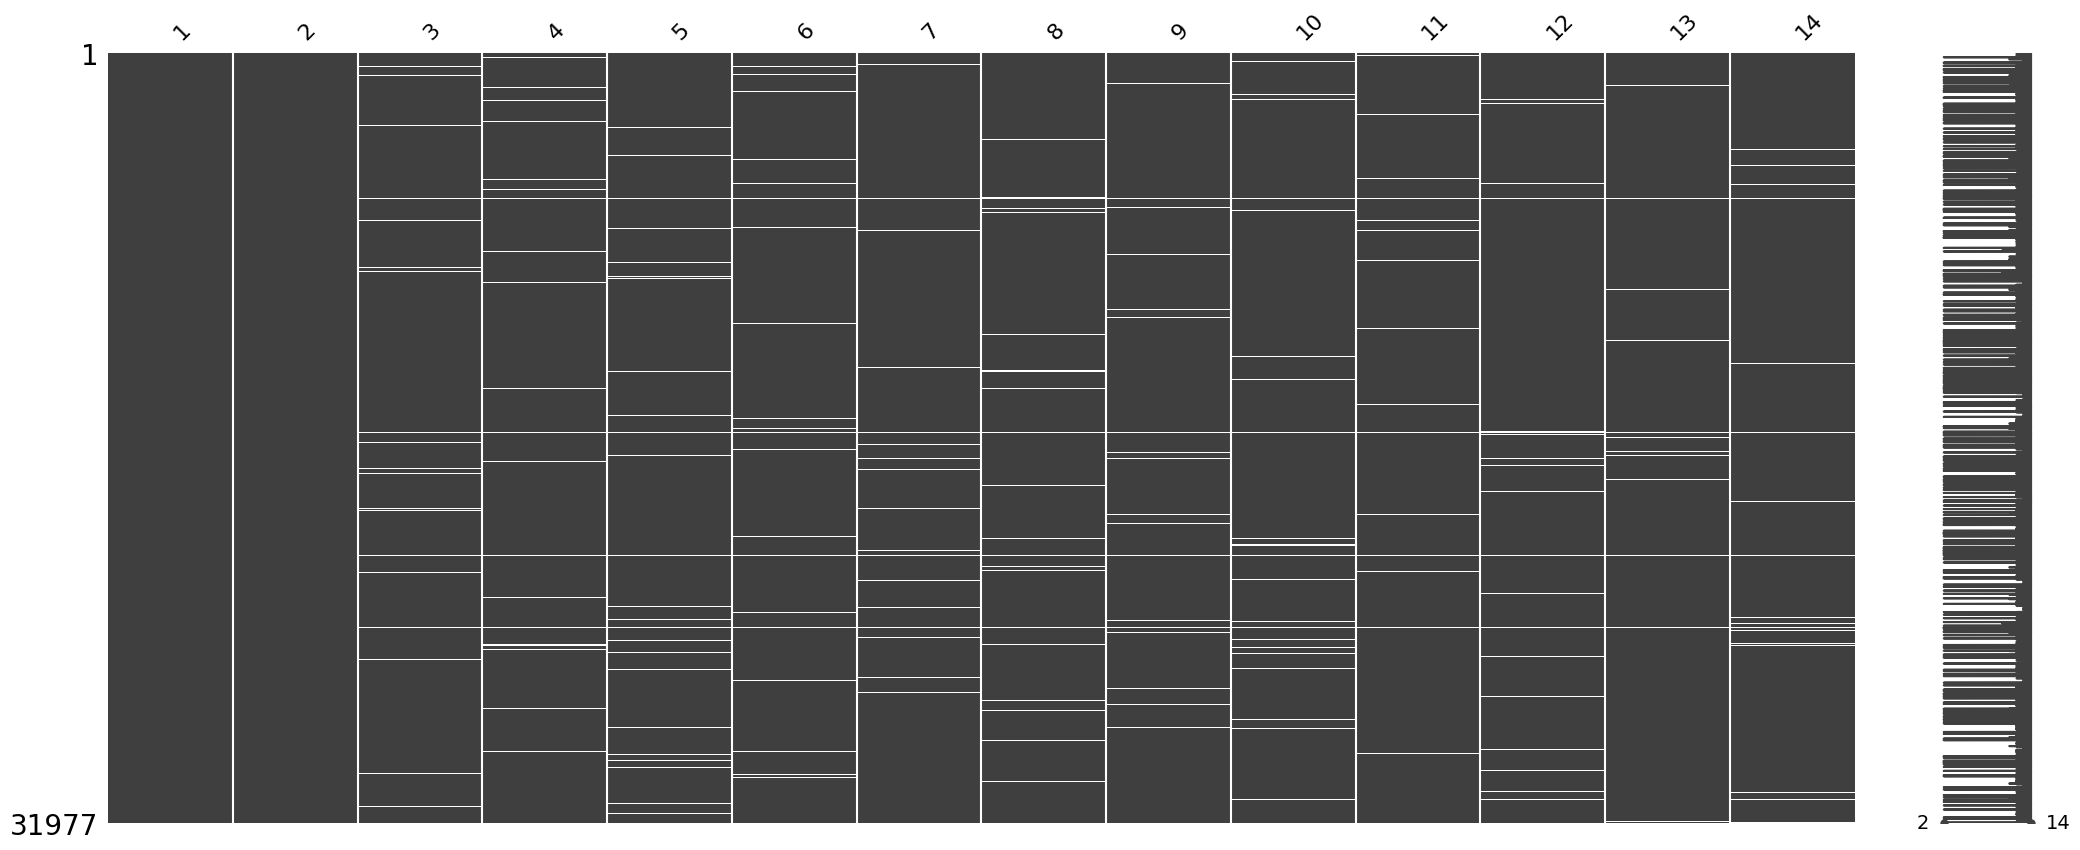

In [160]:
#visulize missing values
msno.matrix(df)

> feature 1 and 2 has no missing values but other featues have plenty of missing values

In [161]:
# Rename column names to use the features of string column
df.rename(columns={1: 'One', 2:'Two', 3: 'Three', 4:'Four',
                   5:'Five', 6:'Six', 7:'Seven', 8:'Eight',
                   9:'Nine',10:'Ten', 11:'Eleven', 12:'Twelve',
                   13:'Thirteen', 14:'Fourteen'}, inplace=True)

In [162]:
df.columns

Index(['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine',
       'Ten', 'Eleven', 'Twelve', 'Thirteen', 'Fourteen'],
      dtype='object')

In [163]:
df

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten,Eleven,Twelve,Thirteen,Fourteen
Date,,,,,,,,,,,,,,
1900-01-01,5.75,52.75,2.6,1.1,2.4,7.5,11.7,16.7,18.9,17.0,15.1,10.8,6.6,6.1
1900-01-02,5.75,52.25,3.2,1.8,3.1,7.7,11.8,16.6,19.0,16.9,14.8,10.7,6.4,5.9
1900-01-03,5.75,51.75,3.5,3.0,3.3,7.9,12.1,16.5,19.2,16.7,14.5,10.3,5.9,5.6
1900-01-05,5.75,51.25,4.4,4.0,4.0,8.9,12.6,17.2,19.8,16.8,15.0,10.7,7.2,6.2
1900-01-06,5.75,50.75,4.4,3.7,3.7,8.2,12.5,16.7,19.6,16.5,14.9,10.3,6.3,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-23,14.75,49.25,-6.0,1.0,5.9,6.3,13.7,18.3,18.6,18.4,11.7,9.6,3.3,0.4
2017-09-24,14.75,48.75,-5.9,1.3,6.2,6.8,13.6,18.6,18.8,19.1,11.7,9.7,3.4,-0.3
2017-09-26,14.75,48.25,-4.5,2.0,7.2,7.9,14.9,19.6,19.4,19.6,12.9,10.5,3.9,0.9


> ### time to do some visualization before working on Null values

In [164]:
# copy the dataframe into another variable
df_copy = df.copy()

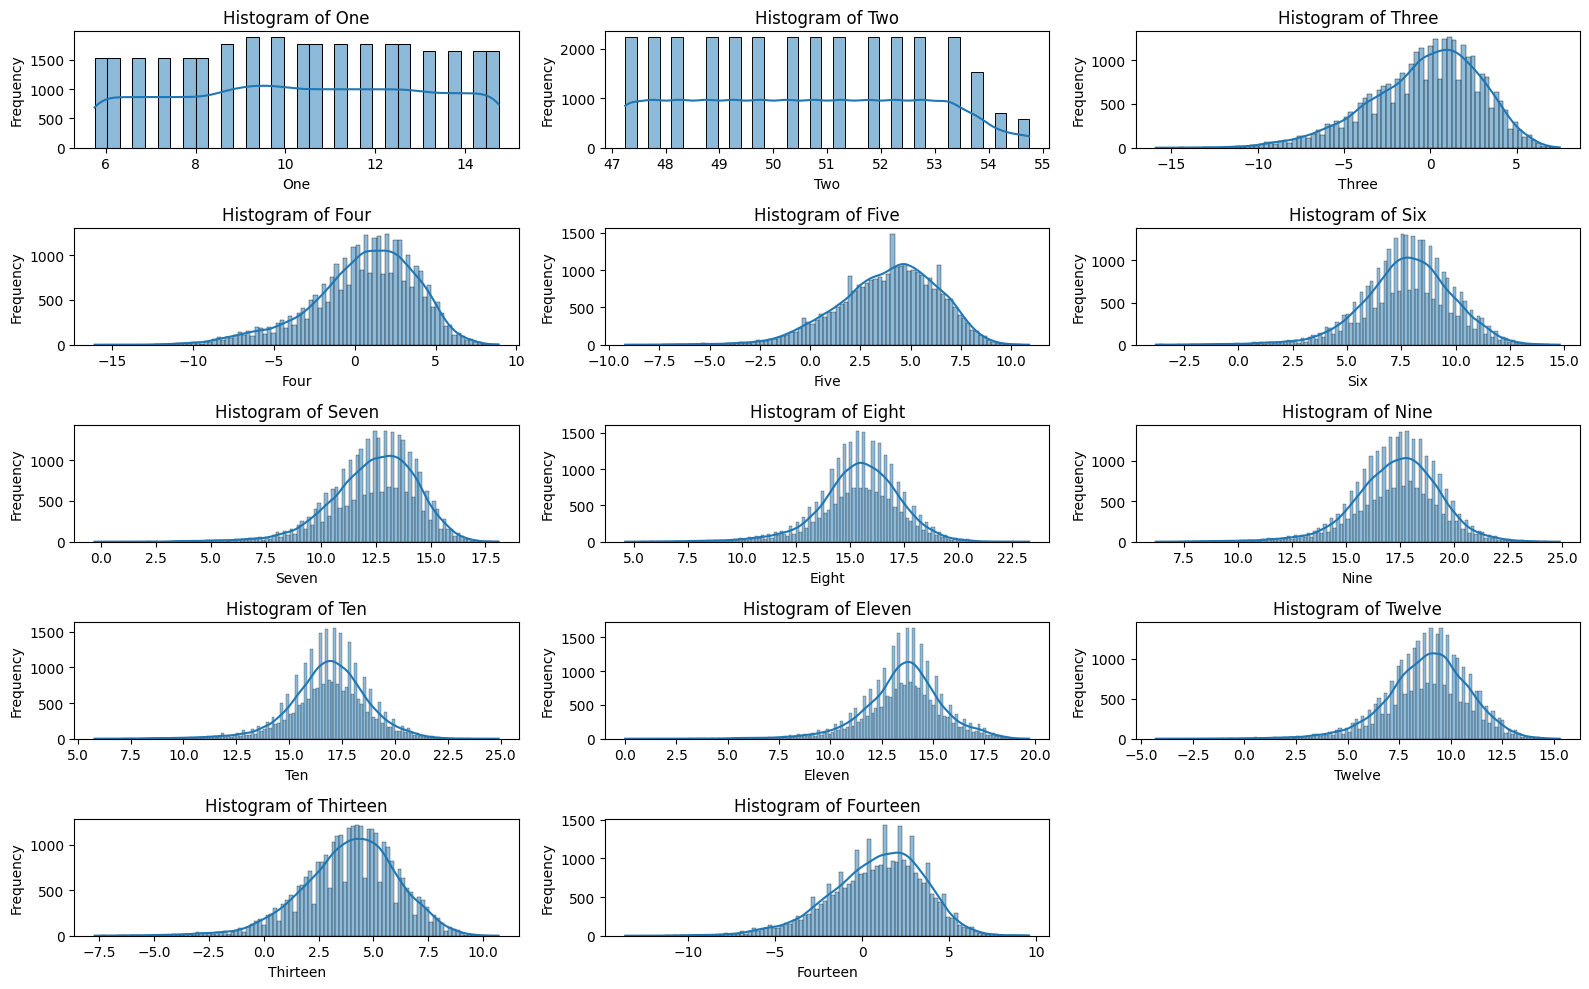

In [165]:
# Determine the number of rows and columns for subplots
num_cols = 3  # Number of histograms per row
num_features = len(df_copy.columns)
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))

for i, column in enumerate(df_copy.columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=df_copy, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

for i in range(num_features, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

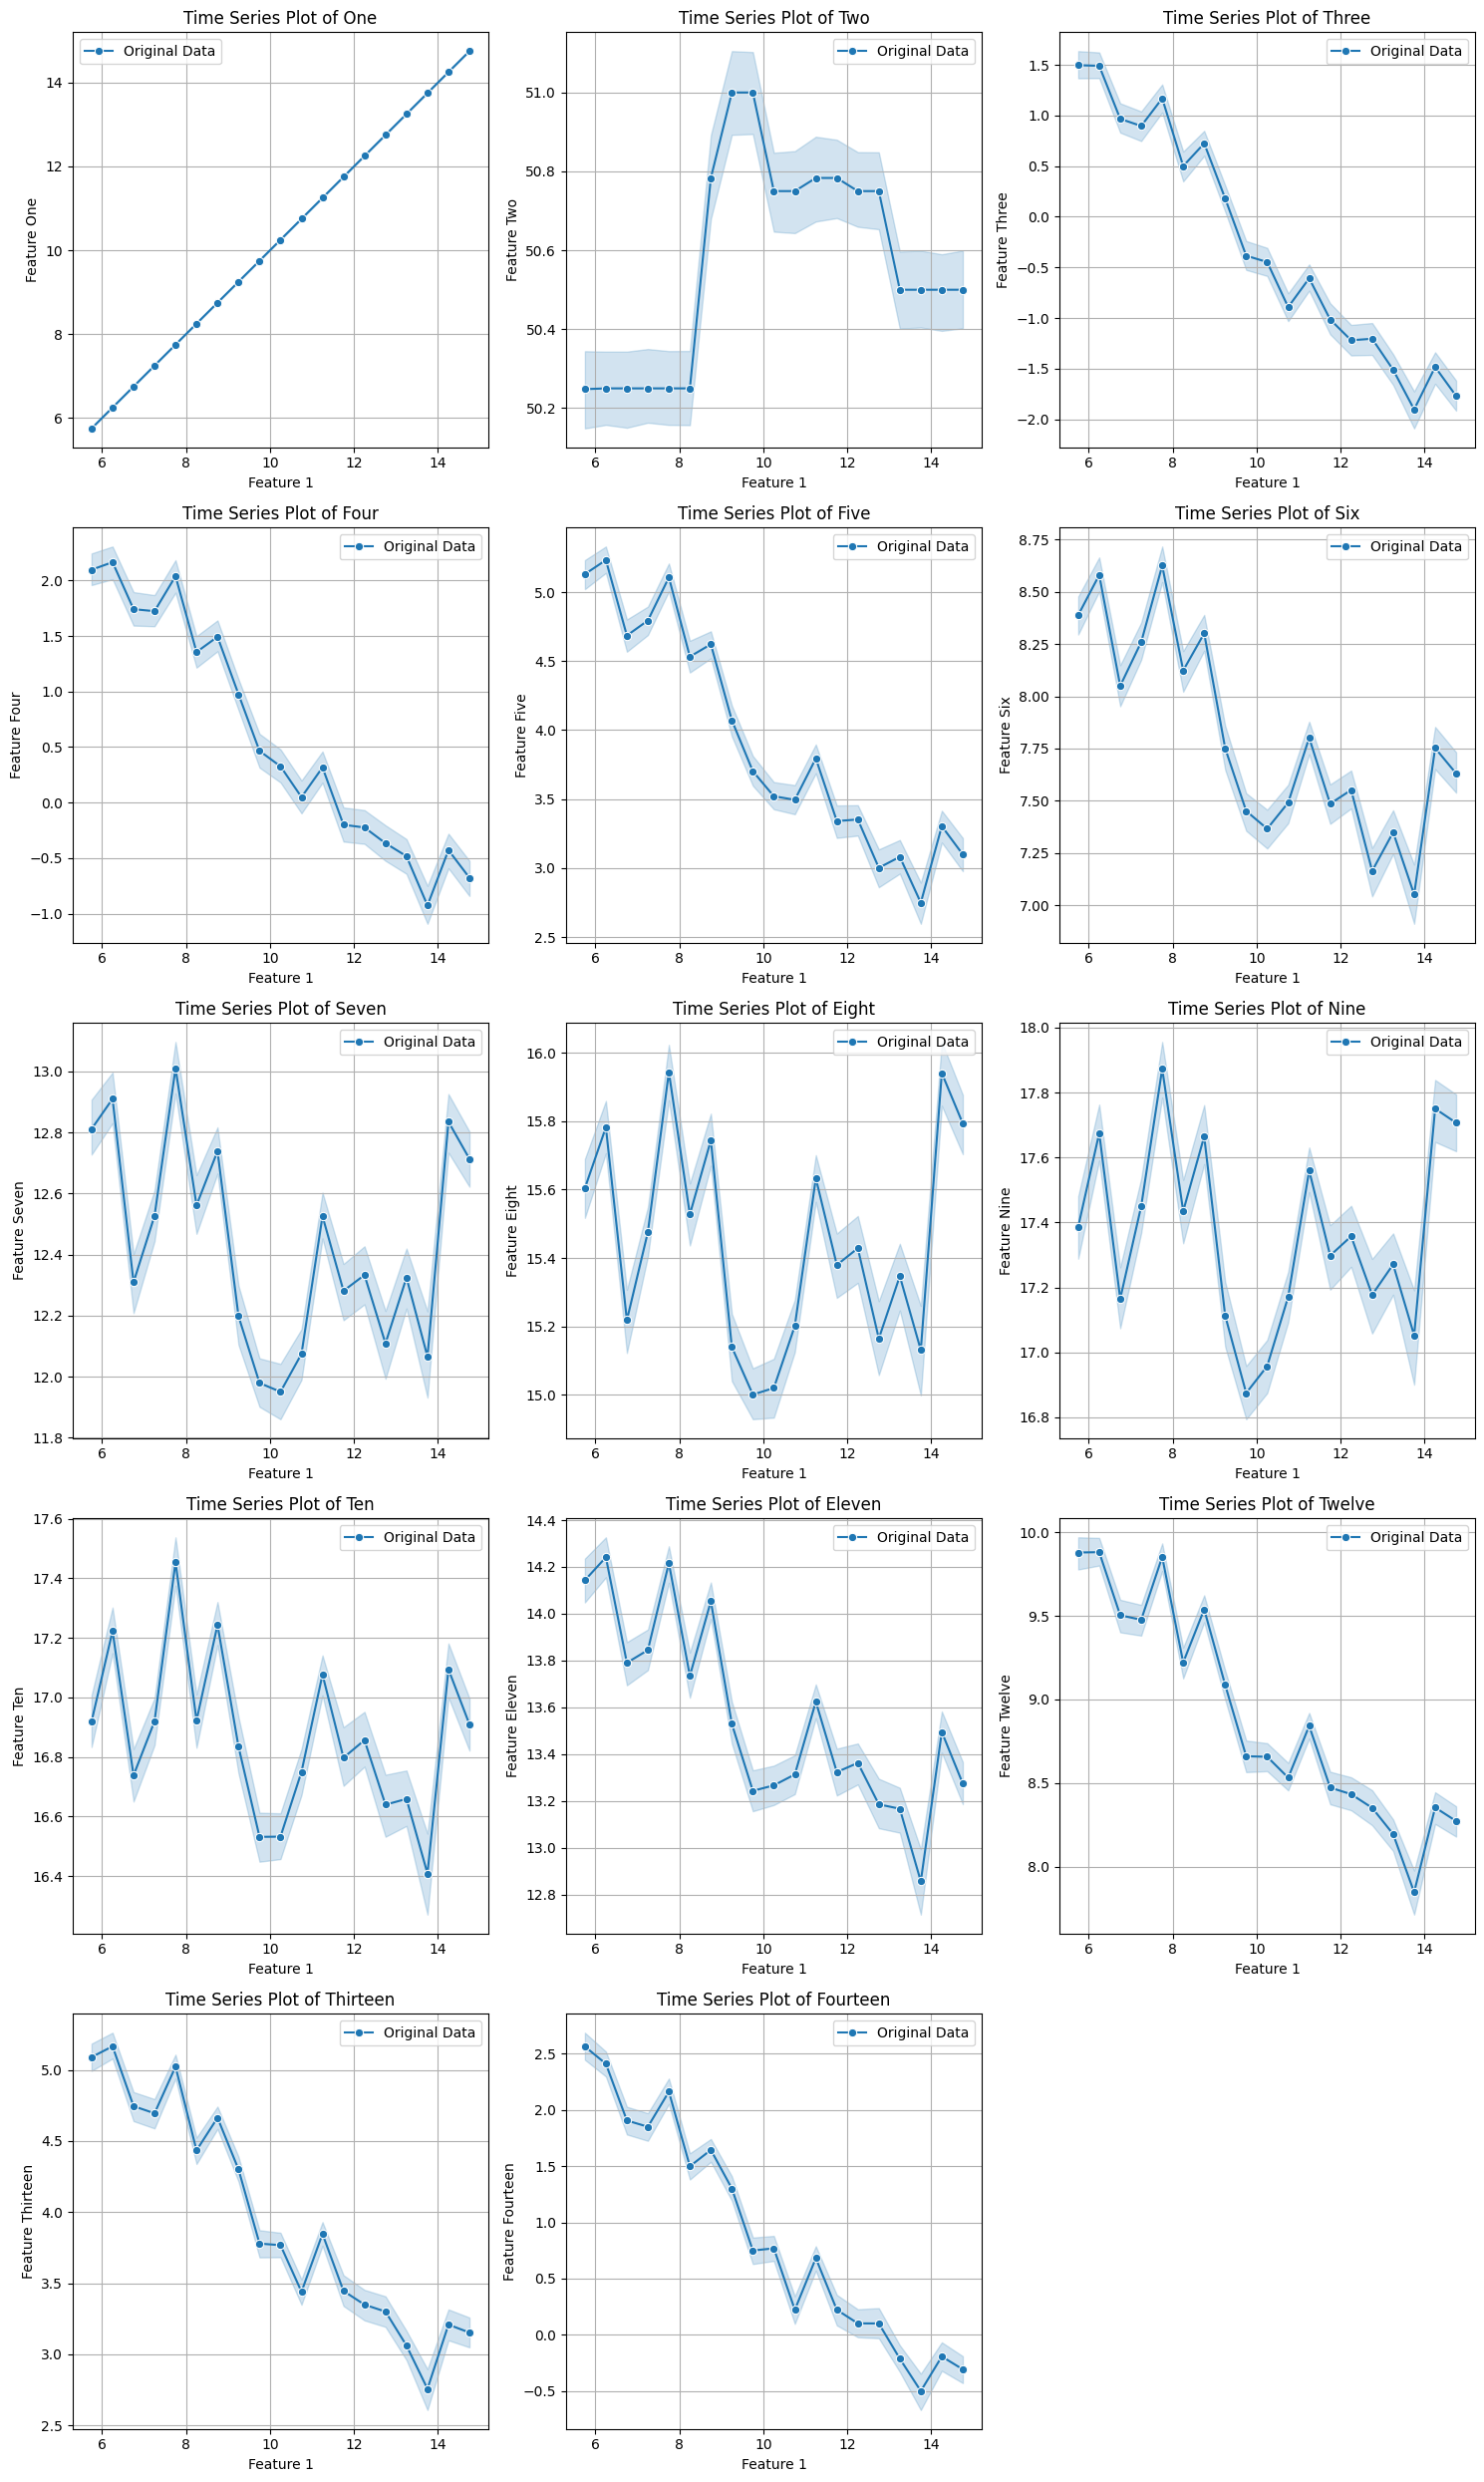

In [166]:
# Determine the number of rows and columns for subplots
num_cols = 3  # Number of line plots per row
num_features = len(df.columns)
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, column in enumerate(df_copy.columns):
    row = i // num_cols
    col = i % num_cols
    sns.lineplot(data=df, x=df['One'], y=df[column], ax=axes[row, col], label='Original Data', marker='o')
    axes[row, col].set_title(f'Time Series Plot of {column}')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel(f'Feature {column}')
    axes[row, col].grid(True)

for i in range(num_features, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

### predicting null values
<a id="predicting-null-values"></a>

>### The Task is to fill the null values of features:

-  Here are some common strategies for filling null values:
     - Mean/Median/Mode Imputation
     - Interpolation
     - Predictive Models
     - Custom Functions or Business Logic and others

We measure the values with the simple Machine learning model using Ranndom Forest Regressor:
-

    - This approach for filling missing values involves using a Random Forest Regressor model to predict the missing values based on the non-missing data:
 - Identification of Missing Values:
 - Data Preparation
 - Model Training
 - Prediction
 - Fill Missing Values


In [168]:
# Identification of Missing Values
# Separate columns with missing values from those without
columns_with_missing = df.columns[df.isnull().any()].tolist()
columns_without_missing = df.columns.difference(columns_with_missing).tolist()

In [169]:
columns_without_missing

['One', 'Two']

In [170]:
# Data Preparation
# Drop rows with NaN values in the target variable
df = df.dropna(subset=columns_with_missing)

In [171]:
# Model Training
# Train a Random Forest model to predict missing values
rf = RandomForestRegressor()

In [172]:
rf.fit(df[columns_without_missing], df[columns_with_missing])

RandomForestRegressor()

In [173]:
# Prediction
# Predict missing values
missing_values_predicted = rf.predict(df[columns_without_missing])


In [174]:
# Fill missing values in the DataFrame
for i, col in enumerate(columns_with_missing):
    df[col] = df[col].fillna(pd.Series(missing_values_predicted[:, i], index=df.index))

/var/folders/qm/dsdxjcz90xq73hh53x6vlzrh0000gn/T/ipykernel_1684/3877147778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(pd.Series(missing_values_predicted[:, i], index=df.index))


In [175]:
df.isnull().sum()

One         0
Two         0
Three       0
Four        0
Five        0
Six         0
Seven       0
Eight       0
Nine        0
Ten         0
Eleven      0
Twelve      0
Thirteen    0
Fourteen    0
dtype: int64

### Data Visualization
<a id="data-visualization"></a>

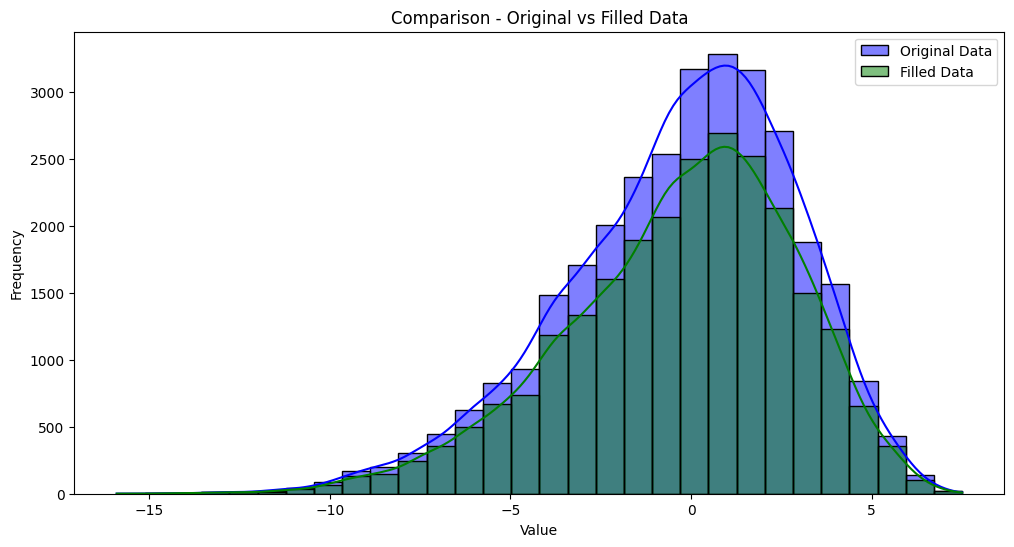

In [184]:
# Compare histograms
plt.figure(figsize=(12, 6))
sns.histplot(data=df_copy, x='Three', bins=30, color='blue', alpha=0.5, kde=True, label='Original Data')
sns.histplot(data=df, x='Three', bins=30, color='green', alpha=0.5, kde=True, label='Filled Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison - Original vs Filled Data')
plt.legend()
plt.show()

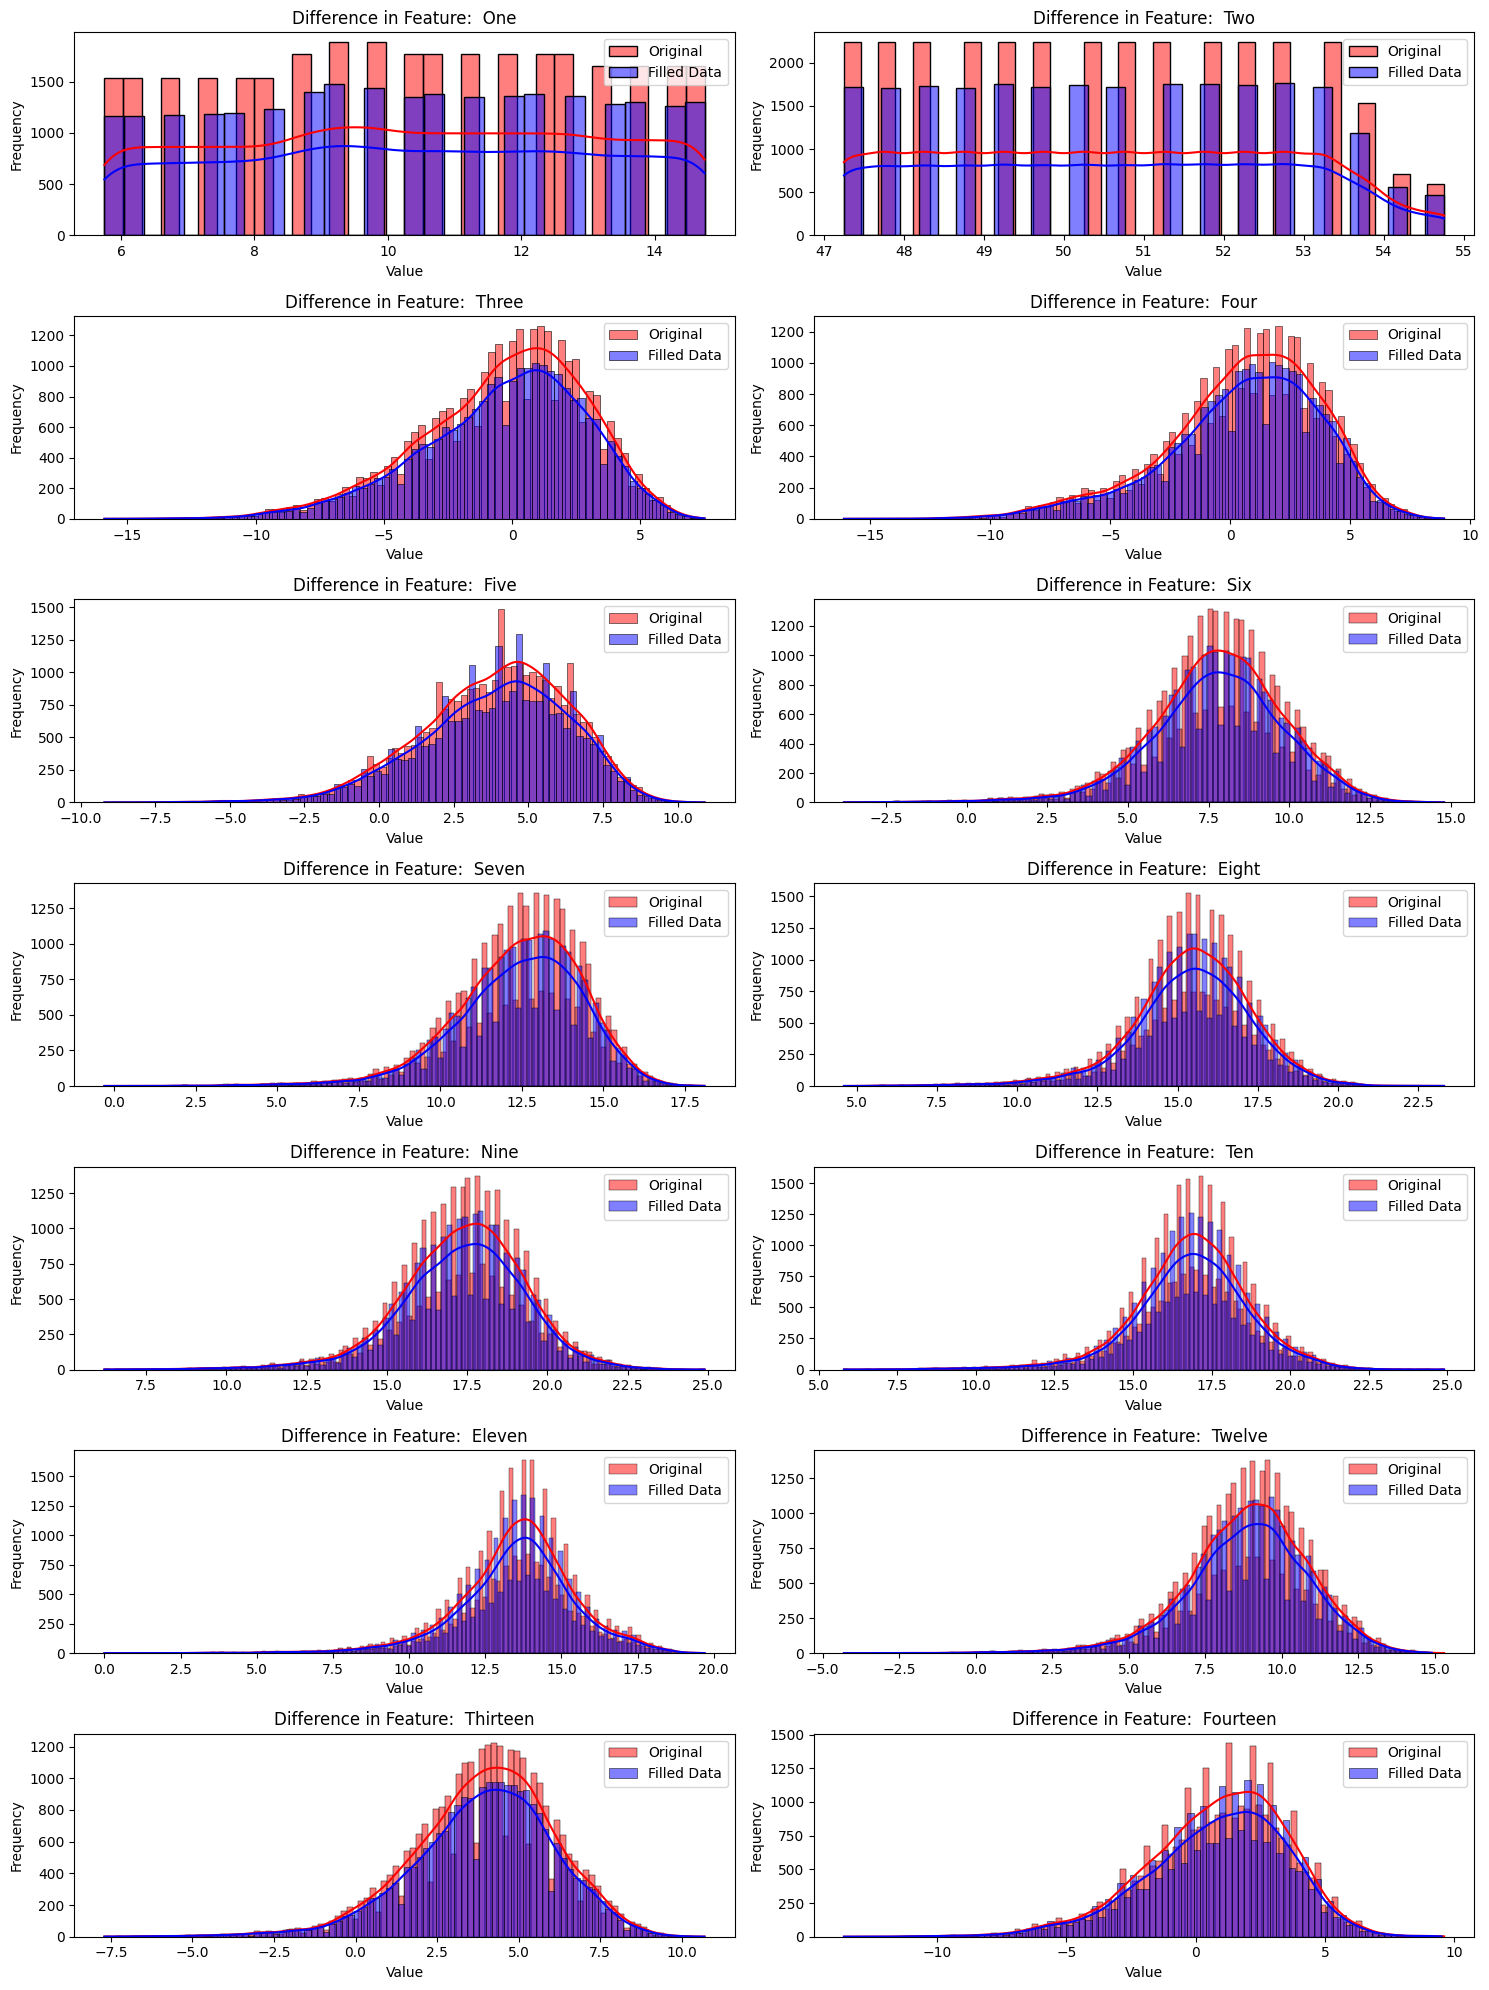

In [185]:
# Create subplots for each feature
fig, axes = plt.subplots(7, 2, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each feature
for i, feature in enumerate(df_copy.columns):
    ax = sns.histplot(df_copy[feature], color='red', label='Original', kde=True, ax=axes[i])
    ax = sns.histplot(df[feature], color='blue', label='Filled Data', kde=True, ax=ax)
    ax.set_title(f'Difference in Feature:  {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

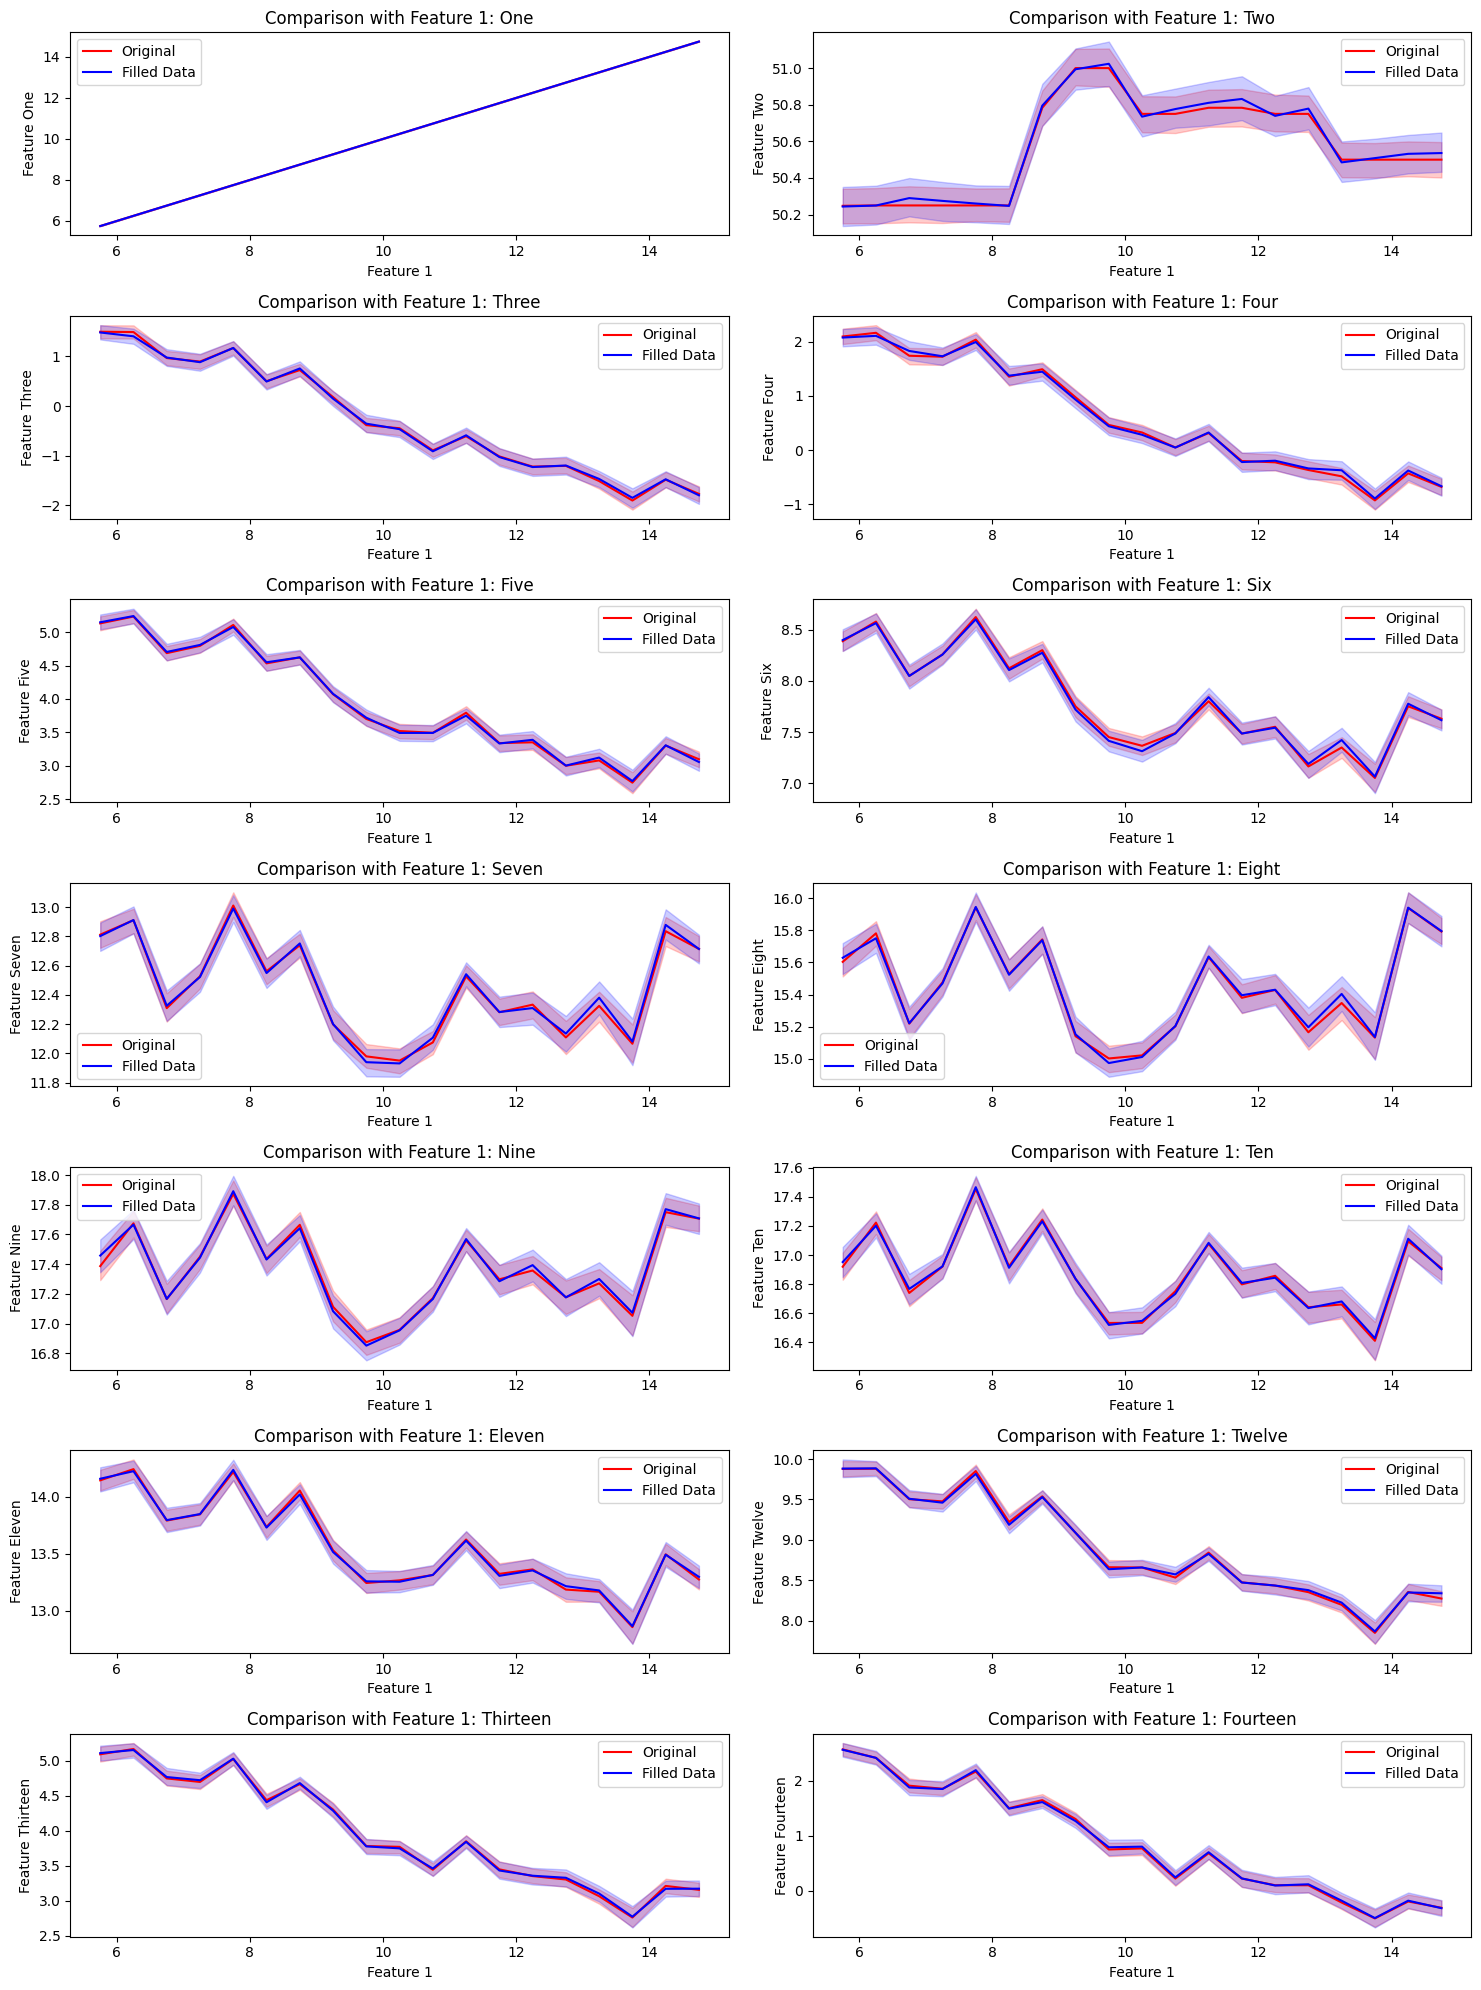

In [177]:
# Create subplots for each feature
fig, axes = plt.subplots(7, 2, figsize=(15, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each feature
for i, feature in enumerate(df_copy.columns):
    ax = sns.lineplot(data=df_copy, x=df_copy['One'], y=df_copy[feature], color='red', label='Original', ax=axes[i])
    ax = sns.lineplot(data=df, x=df['One'], y=df[feature], color='blue', label='Filled Data', ax=ax)
    ax.set_title(f'Comparison with Feature 1: {feature}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel(f'Feature {feature}')
    ax.legend()

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Conclusion
<a id="conclusion"></a>

> #### we can observe similar patterns or trends in the relationship between each feature and feature number one, it could indicate that there is some degree of correlation or similarity in the behavior of these features over time.
- exept featur 1 and 2 there are similar patterns for 4 groups of features:
    - 1: Features 3, 4 and 5
    - 2: Features 6, 7 and 8
    - 3: Features 9, 10 and 11
    - 4: Features 12, 13 and 14

          - The presence of four groups, each containing three features with similar patterns, may indeed correspond to seasons of the year. For example, these groups could represent the four seasons: spring, summer, autumn, and winter.

                one           two         three          four          five  \
count  24753.000000  24753.000000  24753.000000  24753.000000  24753.000000   
mean      10.340009     50.603028     -0.305426      0.568335      3.897948   
std        2.675898      2.094158      3.196663      3.233524      2.461869   
min        5.750000     47.250000    -15.900000    -16.100000     -9.200000   
25%        8.250000     48.750000     -2.300000     -1.200000      2.400000   
50%       10.250000     50.750000      0.100000      0.900000      4.100000   
75%       12.750000     52.250000      2.000000      2.900000      5.700000   
max       14.750000     54.750000      7.500000      8.900000     10.900000   

                six         seven         eight          nine           ten  \
count  24753.000000  24753.000000  24753.000000  24753.000000  24753.000000   
mean       7.775571     12.425290     15.439781     17.360207     16.865475   
std        2.081984      1.955068      1.885810    

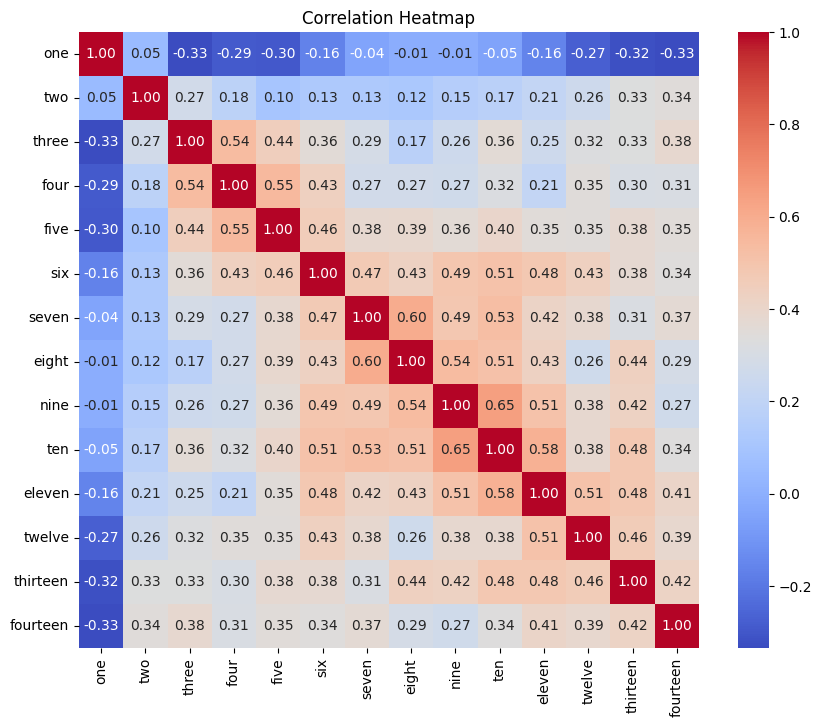

In [120]:
# Summary statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
